In [1]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install keras

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for keras from https://files.pythonhosted.org/packages/8d/44/c604ecc5c9993b6574a681f2f505e980725871a89cfd9e48597b12ccb506/keras-3.3.3-py3-none-any.whl.metadata
  Obtaining dependency information for absl-py from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for rich from https://files.pythonhosted.org/packages/87/67/a37f6214d0e9fe57f6ae54b2956d550ca8365857f42a1ce0392bb21d9410/rich-13.7.1-py3-none-any.whl.metadata
  Obtaining dependency information for namex from https://files.pythonhosted.org/packages/73/59/7854fbfb59f8ae35483ce93493708be5942ebb6328cd85b3a609df629736/namex-0.0.8-py3-none-any.whl.metadata
  Obtaining dependency information for optree from https://files.pythonhosted.org/packages/8f/db/e05a35451d4ba30fdc65ef168dfdc68a6939ea6afd

In [1]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/e4/14/d795bb156f8cc10eb1dcfe1332b7dbb8405b634688980aa9be8f885cc888/tensorflow-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow-2.16.1-cp311-cp311-win_amd64.whl.metadata (3.5 kB)
  Obtaining dependency information for tensorflow-intel==2.16.1 from https://files.pythonhosted.org/packages/e0/36/6278e4e7e69a90c00e0f82944d8f2713dd85a69d1add455d9e50446837ab/tensorflow_intel-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow_intel-2.16.1-cp311-cp311-win_amd64.whl.metadata (5.0 kB)
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Obtaining dependency in

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dataset_train = pd.read_csv("GSBD.csv")
dataset_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-05-13,19.590000,19.889999,19.580000,19.840000,8.954912,72100
1,2016-05-16,19.850000,19.980000,19.740000,19.889999,8.977479,111400
2,2016-05-17,19.959999,20.000000,19.889999,19.900000,8.981995,71900
3,2016-05-18,20.000000,20.000000,19.840000,19.860001,8.963941,89800
4,2016-05-19,19.959999,19.959999,19.799999,19.879999,8.972969,46100


In [4]:
dataset_train.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1757,2023-05-08,13.05,13.220,13.03,13.07,11.567335,586900
1758,2023-05-09,13.05,13.218,12.97,13.09,11.585037,663600
1759,2023-05-10,13.23,13.230,13.00,13.08,11.576186,483000
1760,2023-05-11,13.02,13.180,13.02,13.16,11.646988,294100
1761,2023-05-12,13.20,13.270,13.02,13.08,11.576186,337600


In [5]:
training_set = dataset_train.iloc[:,1:2].values

print(training_set)
print(training_set.shape)

[[19.59    ]
 [19.85    ]
 [19.959999]
 ...
 [13.23    ]
 [13.02    ]
 [13.2     ]]
(1762, 1)


In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))
scaled_training_set = scaler.fit_transform(training_set)

scaled_training_set
#data preprocessing

array([[0.65209794],
       [0.66724946],
       [0.67365965],
       ...,
       [0.28146855],
       [0.26923078],
       [0.2797203 ]])

In [7]:
X_train=[]
Y_train=[]
for i in range(60,1762):
    X_train.append(scaled_training_set[i-60:i,0])
    Y_train.append(scaled_training_set[i,0])
X_train=np.array(X_train)
Y_train=np.array(Y_train)

In [8]:
print(X_train.shape)
print(Y_train.shape)

(1702, 60)
(1702,)


In [9]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(1702, 60, 1)

In [10]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [11]:
regressor = Sequential()

regressor.add(LSTM(units=100, return_sequences=True,input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units=100,return_sequences=True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units=100,return_sequences=True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units=100))
regressor.add(Dropout(0.3))

regressor.add(Dense(units=1))

C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
regressor.compile(optimizer = 'adam',loss='mean_squared_error')
regressor.fit(X_train,Y_train,epochs=100,batch_size=64)

Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 11s 180ms/step - loss: 0.1194
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 177ms/step - loss: 0.0140
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 164ms/step - loss: 0.0087
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 161ms/step - loss: 0.0075
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 162ms/step - loss: 0.0068
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 168ms/step - loss: 0.0066
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 176ms/step - loss: 0.0073
Epoch 8/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 178ms/step - loss: 0.0058
Epoch 9/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 196ms/step - loss: 0.0059
Epoch 10/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 209ms/step - loss: 0.0054
Epoch 11/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 191ms/step - loss: 0.0055
Epoch 12/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 192ms/step - loss: 0.0051
Epoch 13/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 179ms/step - loss: 0.0051
Epoch 14/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 184ms/step - loss: 0.0047
Epoch 15/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s

In [13]:
dataset_test=pd.read_csv("GSBD_test.csv")
actual_stock_price=dataset_test.iloc[:,1:2].values

In [14]:
dataset_total=pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)
inputs = dataset_total[len(dataset_total)-len(dataset_test)-60:].values

inputs=inputs.reshape(-1,1)
inputs=scaler.transform(inputs)

X_test = []
for i in range(60,310):
    X_test.append(inputs[i-60:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0], X_test.shape[1], 1))

In [15]:
predicted_stock_price=regressor.predict(X_test)
predicted_stock_price=scaler.inverse_transform(predicted_stock_price)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step


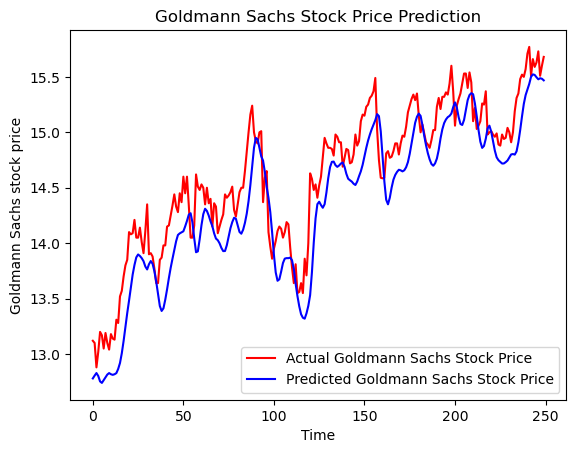

In [16]:
plt.plot(actual_stock_price,color='red',label='Actual Goldmann Sachs Stock Price')
plt.plot(predicted_stock_price,color='blue',label='Predicted Goldmann Sachs Stock Price')
plt.title("Goldmann Sachs Stock Price Prediction")
plt.xlabel('Time')
plt.ylabel('Goldmann Sachs stock price')
plt.legend()